<a href="https://colab.research.google.com/github/ssmubc/IoT_Devices_Python_Project/blob/main/IoT_Devices_Python_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing the efficacy of IoT devices using Time Series Plots
# Python Project


### Context

IoT devices have been around for quite a while now. They are used to collect data through different kinds of sensors such as 
Motion sensors: These use a visual sensor to detect a change in apparent temperature of surroundings  or when someone comes in the field of view of a camera.
Heat sensors: These are used in trucks which carry perishable goods like fish and milk where changes in a temperature lower the shelf life of the produce. These are also used to detect forest fires.

Vibration sensors: These are used in car crash tests and detecting if someone is trying to cut a tree.  

A lot of people are using smartwatches and fitness watches to track their daily physical activities, calories burnt, average resting heart rates, sleep cycle so that they lead a fit life. Such wearables are equipped with laser sensors to collect data.

Heat Index (temperature + humidity ) is one common data recorded on these IoT readers. The frequency of the upcoming data is very fast. The sensor reads hundreds to millions of data per second. There is a huge and versatile application of this data in real-world like agriculture, weather forecasting, soil monitoring and treatment, enterprise maintenance etc.

Heat stress index of India.

<img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/heat_index_india.png' width=600>


---

### Project Objective

The ojective is to test the efficacy of new IoT devices. I have created time-series plots for daily temperature variation for the given duration and found any inconsistencies in the temperature readings. I have also found the percentages of the yellow, orange and red zones. 

---

### Data Description

This dataset contains the temperature readings from an IoT device installed outside and inside of an anonymous room (labelled as admin room) to test the device. The readings were taken between 11 January 2018 and 10 December 2018. Additionally, it was uninstalled or taken down quite frequently during the entire reading period. There are 5 columns and 97,605 rows in the dataset.

1. `id` - unique IDs for each reading

2. `room_id/id` - room id in which device was installed (inside and/or outside). In this dataset, only `Room Admin` label is used as a `room_id` for example purpose.

3. `noted_date` - date and time of reading

4. `temp` - temperature readings

5. `out/in` - whether the reading was taken from a device installed inside or outside of the room?

Here's the dataset link:

https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/iot-devices/IoT-device.csv

---

#### 1. Import Modules & Load Dataset

In [ ]:
# Import the required modules and load the dataset.
import pandas as pd
df = pd.read_csv('https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/iot-devices/IoT-device.csv')

In [ ]:
# Get the information on DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id/id  97606 non-null  object
 2   noted_date  97606 non-null  object
 3   temp        97606 non-null  int64 
 4   out/in      97606 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


---

#### 2. Missing Values Check

Check for the null values in the DataFrame.

In [ ]:
# Check for the null values in the DataFrame.
df.isnull().sum()

id            0
room_id/id    0
noted_date    0
temp          0
out/in        0
dtype: int64

There are no columns in the DataFrame containing the missing values. 

---

#### 3. Drop Unnecessary Columns


Find out if there are unnecessary columns in the DataFrame. If there are any, then drop them from the DataFrame.

In [ ]:
# Find out if there are unnecessary columns in the DataFrame. If there are any, then drop them from the DataFrame. 
df = df.drop('room_id/id', axis=1)
df.head()

,id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,08-12-2018 09:29,31,In


---

#### 4. Get `datetime` Objects

Convert the values contained in the `noted_date` column into the `datetime` objects.

In [ ]:
# Convert the values contained in the 'noted_date' column into the 'datetime' objects.
from datetime import datetime
df['noted_date'] = pd.to_datetime(df['noted_date'])

In [ ]:
df['noted_date']

0       2018-08-12 09:30:00
1       2018-08-12 09:30:00
2       2018-08-12 09:29:00
3       2018-08-12 09:29:00
4       2018-08-12 09:29:00
                ...        
97601   2018-07-28 07:07:00
97602   2018-07-28 07:07:00
97603   2018-07-28 07:06:00
97604   2018-07-28 07:06:00
97605   2018-07-28 07:06:00
Name: noted_date, Length: 97606, dtype: datetime64[ns]

In [ ]:
# Verify whether the conversion is successful or not.
type(df['noted_date'])

pandas.core.series.Series

---

#### 5. Sort The DataFrame

Sort the DataFrame in the chronological order.

In [ ]:
# Sort the DataFrame in the increasing order of dates and time.
df.sort_values(by='noted_date', ascending=True)

,id,noted_date,temp,out/in
16218,__export__.temp_log_126924_cb744837,2018-01-11 00:06:00,32,In
16217,__export__.temp_log_146101_e61c18d4,2018-01-11 00:07:00,40,Out
16216,__export__.temp_log_111262_7b3ed086,2018-01-11 00:09:00,39,Out
16215,__export__.temp_log_147650_344507e9,2018-01-11 00:13:00,40,Out
16214,__export__.temp_log_139505_cd77d7f9,2018-01-11 00:23:00,40,Out
...,...,...,...,...
50668,__export__.temp_log_41241_36e995ef,2018-12-10 23:41:00,44,Out
50667,__export__.temp_log_41244_1cef6363,2018-12-10 23:43:00,44,Out
50666,__export__.temp_log_41249_7d6819cd,2018-12-10 23:49:00,44,Out
50665,__export__.temp_log_41250_eed95540,2018-12-10 23:51:00,45,Out


---

#### 6. Add More Features

Get the year, month, day, day name, hours and minutes values from the `datetime` values and create new columns for the same.

In [ ]:
# Create new columns for year, month, day, day name, hours and minutes values and add to the DataFrame.
year = df['noted_date'].dt.year
month = df['noted_date'].dt.month
day = df['noted_date'].dt.day
day_name = df['noted_date'].dt.day_name()
hour = df['noted_date'].dt.hour
minute = df['noted_date'].dt.minute

df['year'] = year
df['month'] = month
df['day'] = day
df['day_name'] = day_name
df['hour'] = hour
df['minute'] = minute


In [ ]:
# Display the first five rows of the DataFrame.
df.head()

,id,noted_date,temp,out/in,year,month,day,day_name,hour,minute
0,__export__.temp_log_196134_bd201015,2018-08-12 09:30:00,29,In,2018,8,12,Sunday,9,30
1,__export__.temp_log_196131_7bca51bc,2018-08-12 09:30:00,29,In,2018,8,12,Sunday,9,30
2,__export__.temp_log_196127_522915e3,2018-08-12 09:29:00,41,Out,2018,8,12,Sunday,9,29
3,__export__.temp_log_196128_be0919cf,2018-08-12 09:29:00,41,Out,2018,8,12,Sunday,9,29
4,__export__.temp_log_196126_d30b72fb,2018-08-12 09:29:00,31,In,2018,8,12,Sunday,9,29


---

#### 7. Line Plots & Box Plots

Create line plots and box plots for the temperature recorded in the indoor and outdoor settings.

In [ ]:
# Create a DataFrame for the indoor temperature records.
df_indoor = df[df['out/in'] == 'In']
df_indoor.head()

,id,noted_date,temp,out/in,year,month,day,day_name,hour,minute
0,__export__.temp_log_196134_bd201015,2018-08-12 09:30:00,29,In,2018,8,12,Sunday,9,30
1,__export__.temp_log_196131_7bca51bc,2018-08-12 09:30:00,29,In,2018,8,12,Sunday,9,30
4,__export__.temp_log_196126_d30b72fb,2018-08-12 09:29:00,31,In,2018,8,12,Sunday,9,29
5,__export__.temp_log_196125_b0fa0b41,2018-08-12 09:29:00,31,In,2018,8,12,Sunday,9,29
6,__export__.temp_log_196121_01544d45,2018-08-12 09:28:00,29,In,2018,8,12,Sunday,9,28


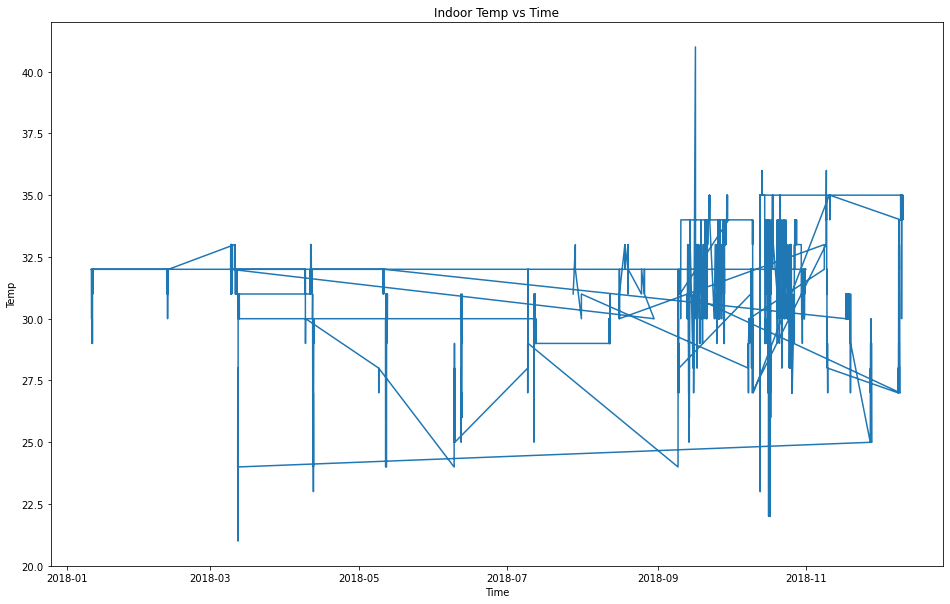

In [ ]:
# Create a time series line plot for the indoor temperature records.
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 10))
plt.plot(df_indoor['noted_date'], df_indoor['temp'])
plt.title('Indoor Temp vs Time')
plt.xlabel('Time')
plt.ylabel('Temp')
plt.show()

In [ ]:
# Create a DataFrame for the outdoor temperature records.
df_outdoor = df[df['out/in'] == 'Out']
df_outdoor.head()

,id,noted_date,temp,out/in,year,month,day,day_name,hour,minute
2,__export__.temp_log_196127_522915e3,2018-08-12 09:29:00,41,Out,2018,8,12,Sunday,9,29
3,__export__.temp_log_196128_be0919cf,2018-08-12 09:29:00,41,Out,2018,8,12,Sunday,9,29
10,__export__.temp_log_196108_4a983c7e,2018-08-12 09:25:00,42,Out,2018,8,12,Sunday,9,25
11,__export__.temp_log_196108_4a983c7e,2018-08-12 09:25:00,42,Out,2018,8,12,Sunday,9,25
16,__export__.temp_log_196094_38501388,2018-08-12 09:21:00,41,Out,2018,8,12,Sunday,9,21


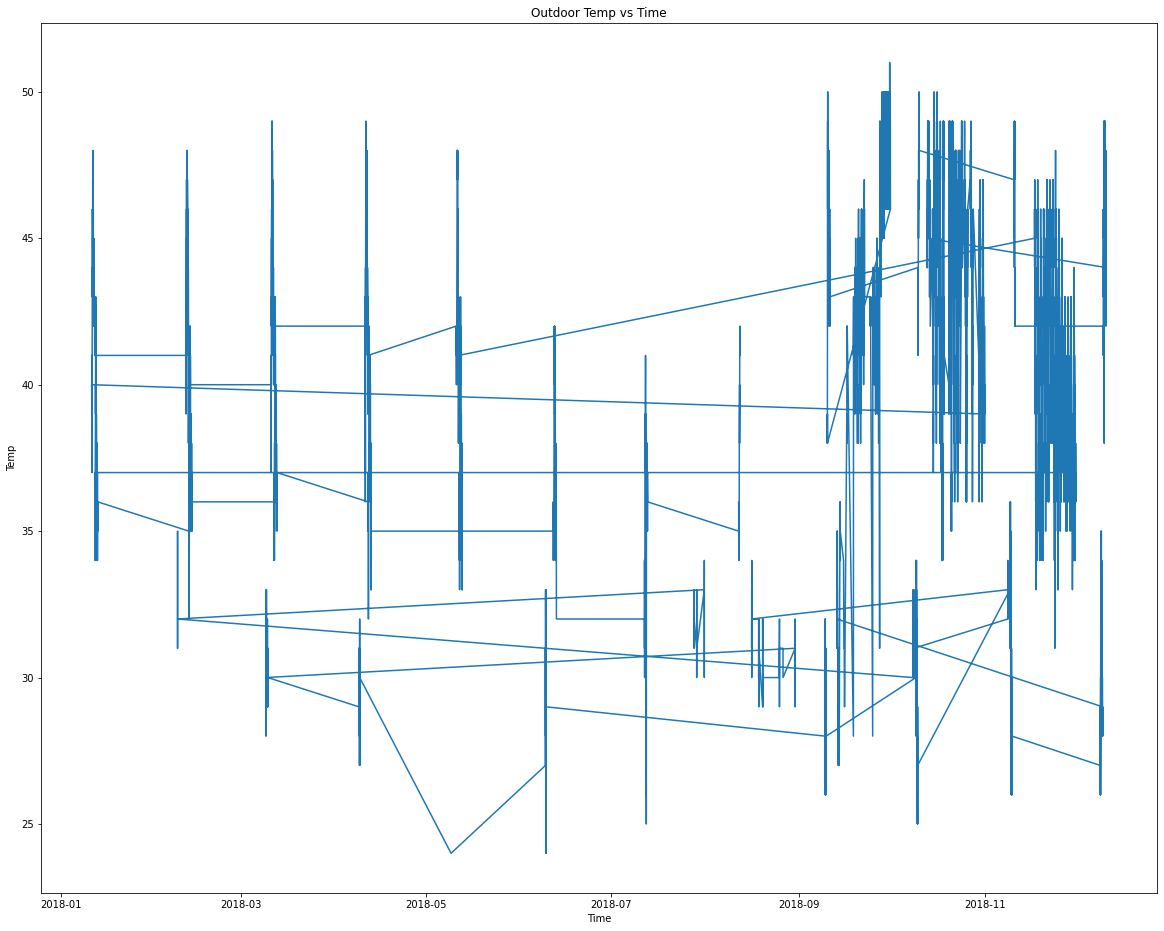

In [ ]:
# Create a time series line plot for the outdoor temperature records.
plt.figure(figsize=(20, 16))
plt.plot(df_outdoor['noted_date'], df_outdoor['temp'])
plt.title('Outdoor Temp vs Time')
plt.xlabel('Time')
plt.ylabel('Temp')
plt.show()

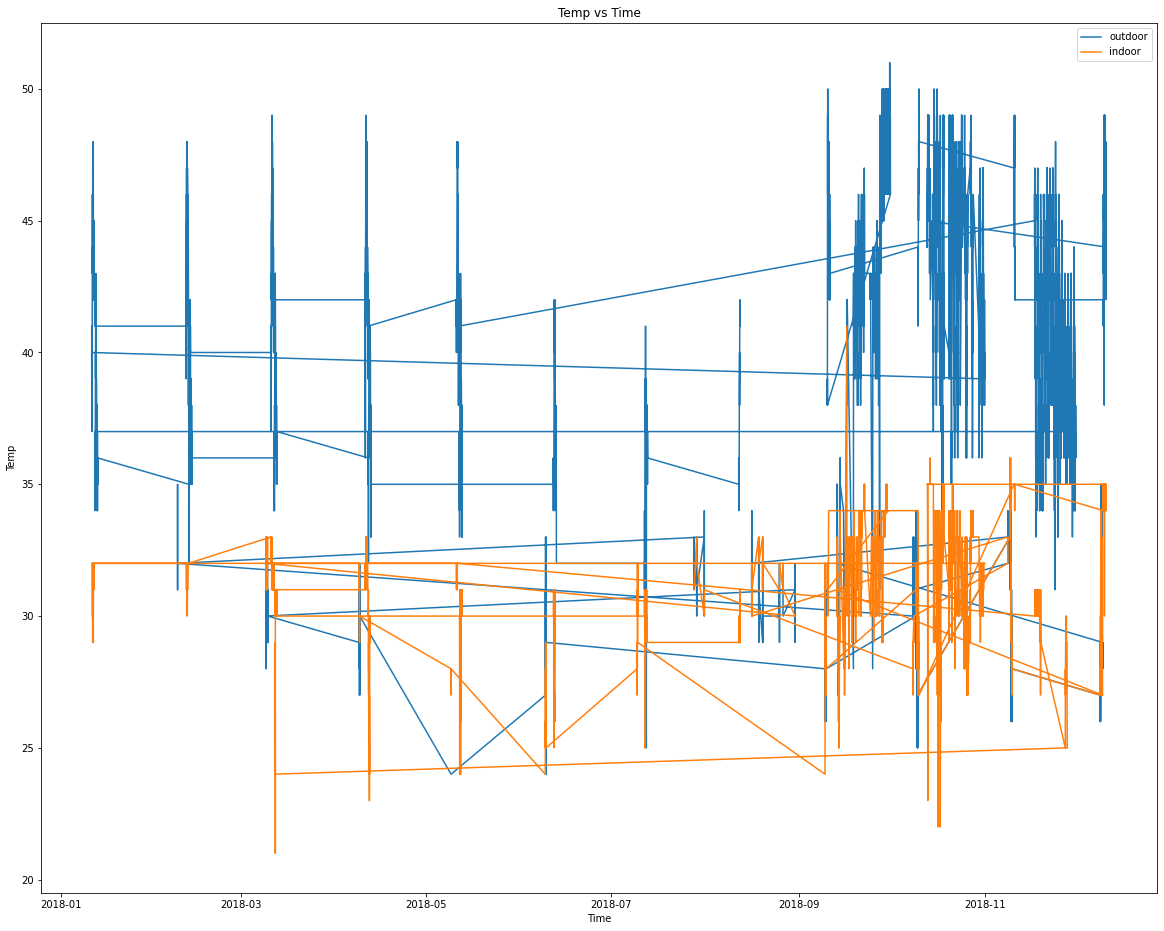

In [ ]:
# Compare the time series line plots for both the indoor and outdoor temperature records.
plt.figure(figsize=(20, 16))
plt.plot(df_outdoor['noted_date'], df_outdoor['temp'], label='outdoor')
plt.plot(df_indoor['noted_date'], df_indoor['temp'], label='indoor')
plt.legend()
plt.title('Temp vs Time')
plt.xlabel('Time')
plt.ylabel('Temp')
plt.show()

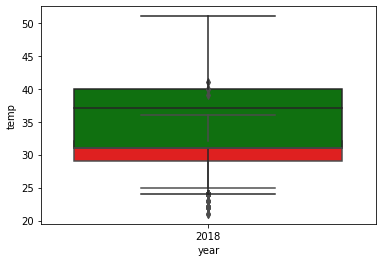

In [ ]:
# Create a box plot to represent the distribution of indoor and outdoor temperatures for the whole year.
import seaborn as sns
sns.boxplot(x='year', y='temp', data=df_indoor, color='red')
sns.boxplot(x='year', y='temp', data=df_outdoor, color='green')
plt.show()

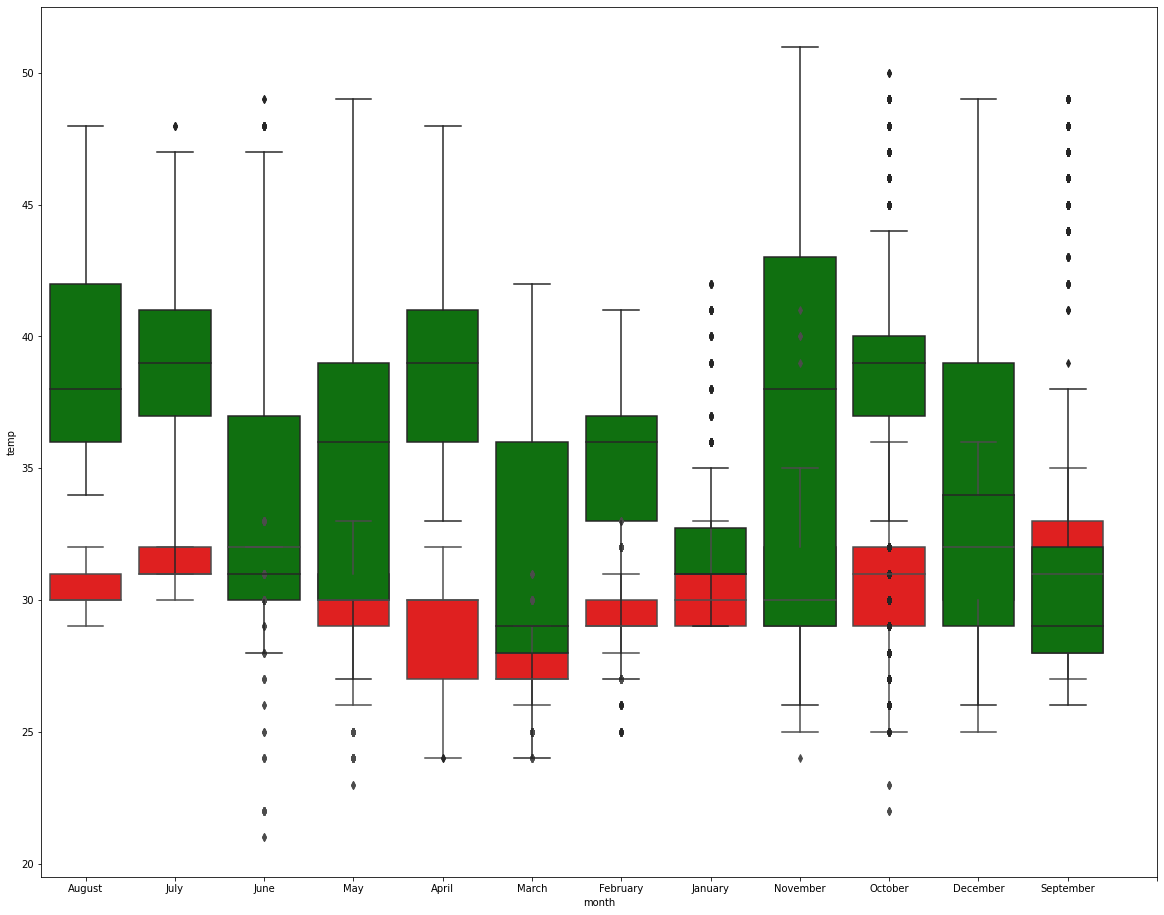

In [ ]:
# Create a box plot to represent the monthly distribution of indoor and outdoor temperatures. Also label the x-axis with actual month names.
import seaborn as sns
import numpy as np

plt.figure(figsize=(20, 16))
sns.boxplot(x='month', y='temp', data=df_indoor, color='red')
sns.boxplot(x='month', y='temp', data=df_outdoor, color='green')
plt.xticks(ticks=np.arange(0, 13), labels=df['noted_date'].dt.month_name().unique())
plt.show()

---

#### 8. Grouping, Aggregation & More Plots

Grouped the data by the indoor and outdoor temperatures. Also, got monthly mean, standard deviation, median, minimum and maximum values for both the indoor and outdoor groups.


In [ ]:
# Group the data to get the monthly median indoor and outdoor temperatures along with the max and minimum temperatures.
indoor_by_month = df_indoor.groupby(by='month', as_index=False)
outdoor_by_month = df_outdoor.groupby(by='month', as_index=False)
indoor_median_temp = indoor_by_month.median()['temp']
outdoor_median_temp = outdoor_by_month.median()['temp']
indoor_max = indoor_by_month.agg(func='max')
indoor_min = indoor_by_month.agg(func='min')
outdoor_max = outdoor_by_month.agg(func='max')
outdoor_min = outdoor_by_month.agg(func='min')

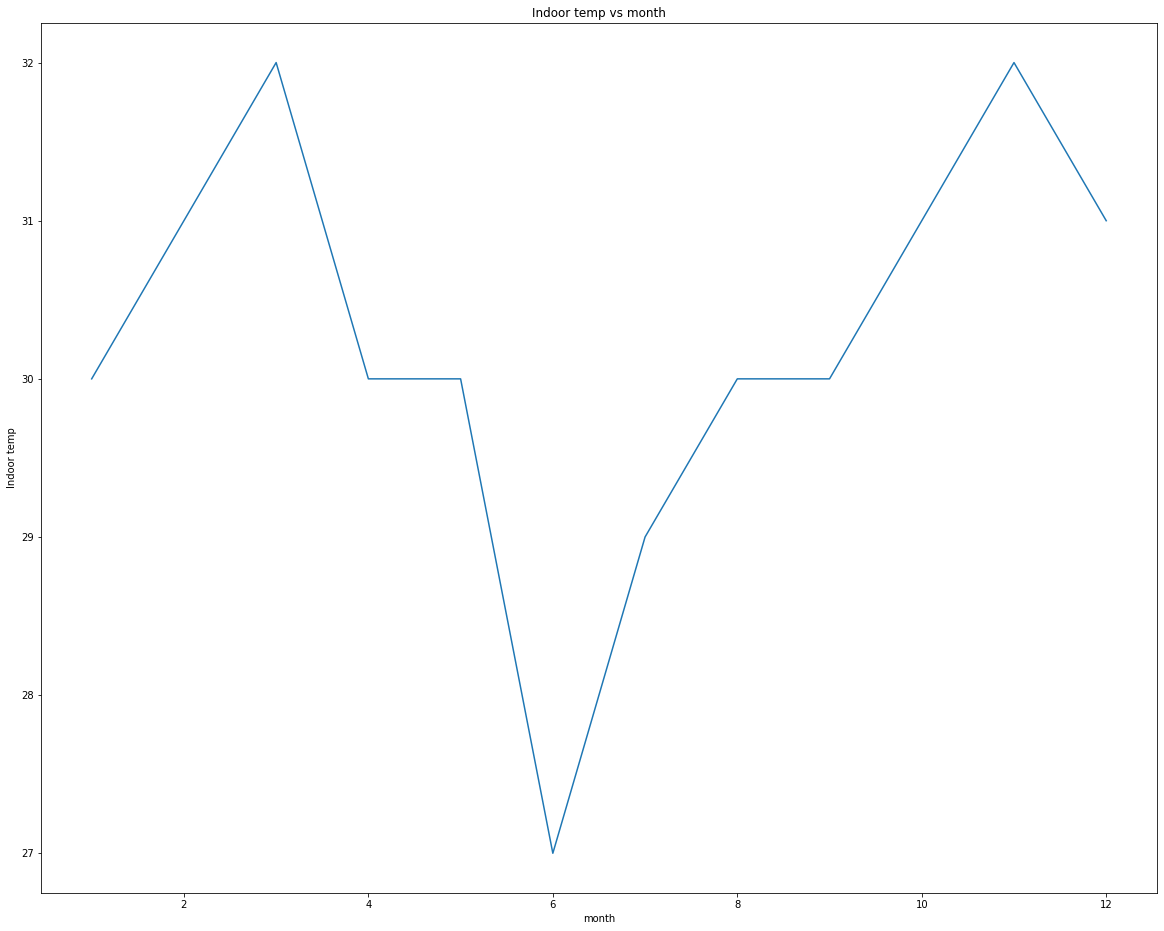

In [ ]:
# Create a line plot for the monthly median indoor temperatures.
plt.figure(figsize=(20, 16))
plt.plot(np.arange(1, 13), indoor_median_temp)
plt.title('Indoor temp vs month')
plt.xlabel('month')
plt.ylabel('Indoor temp')
plt.show()

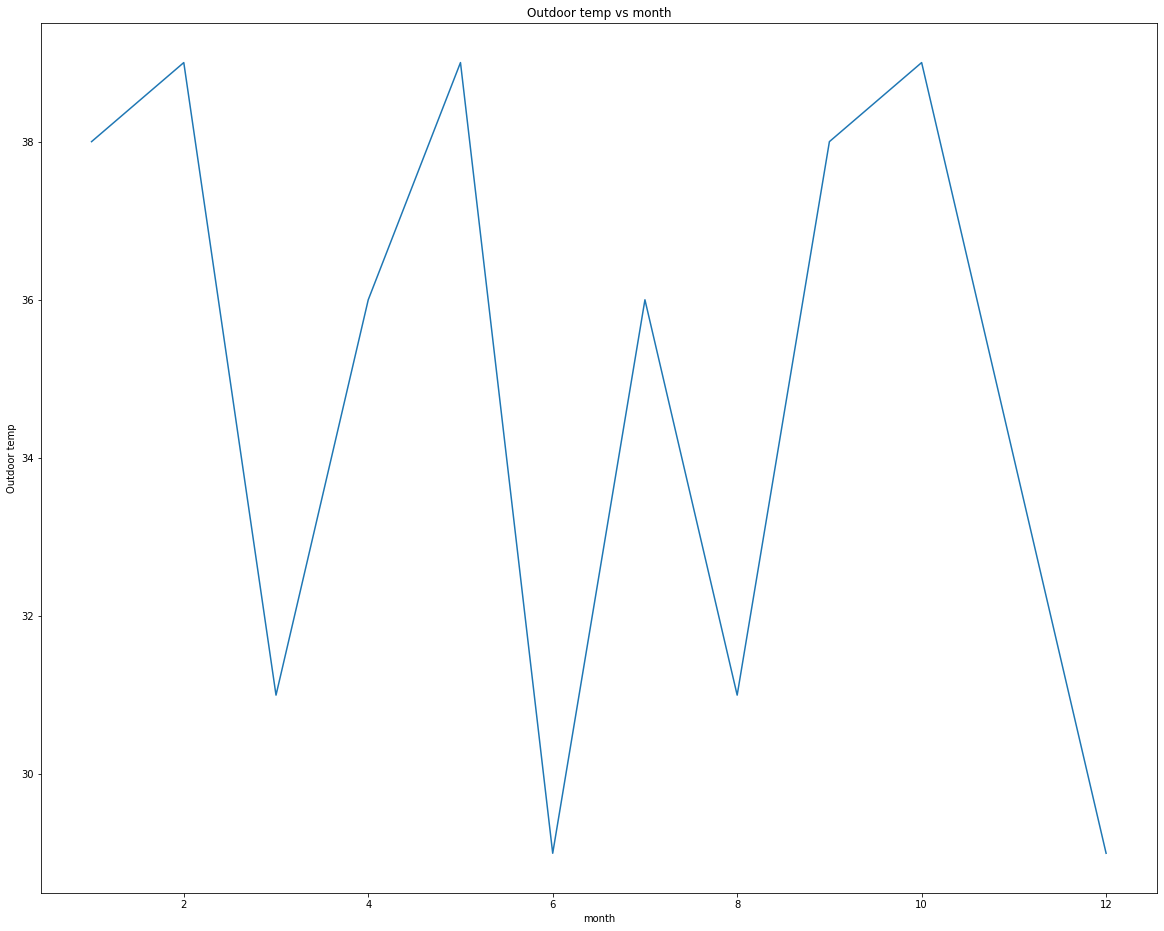

In [ ]:
# Create a line plot for the monthly median outdoor temperatures.
plt.figure(figsize=(20, 16))
plt.plot(np.arange(1, 13), outdoor_median_temp)
plt.title('Outdoor temp vs month')
plt.xlabel('month')
plt.ylabel('Outdoor temp')
plt.show()

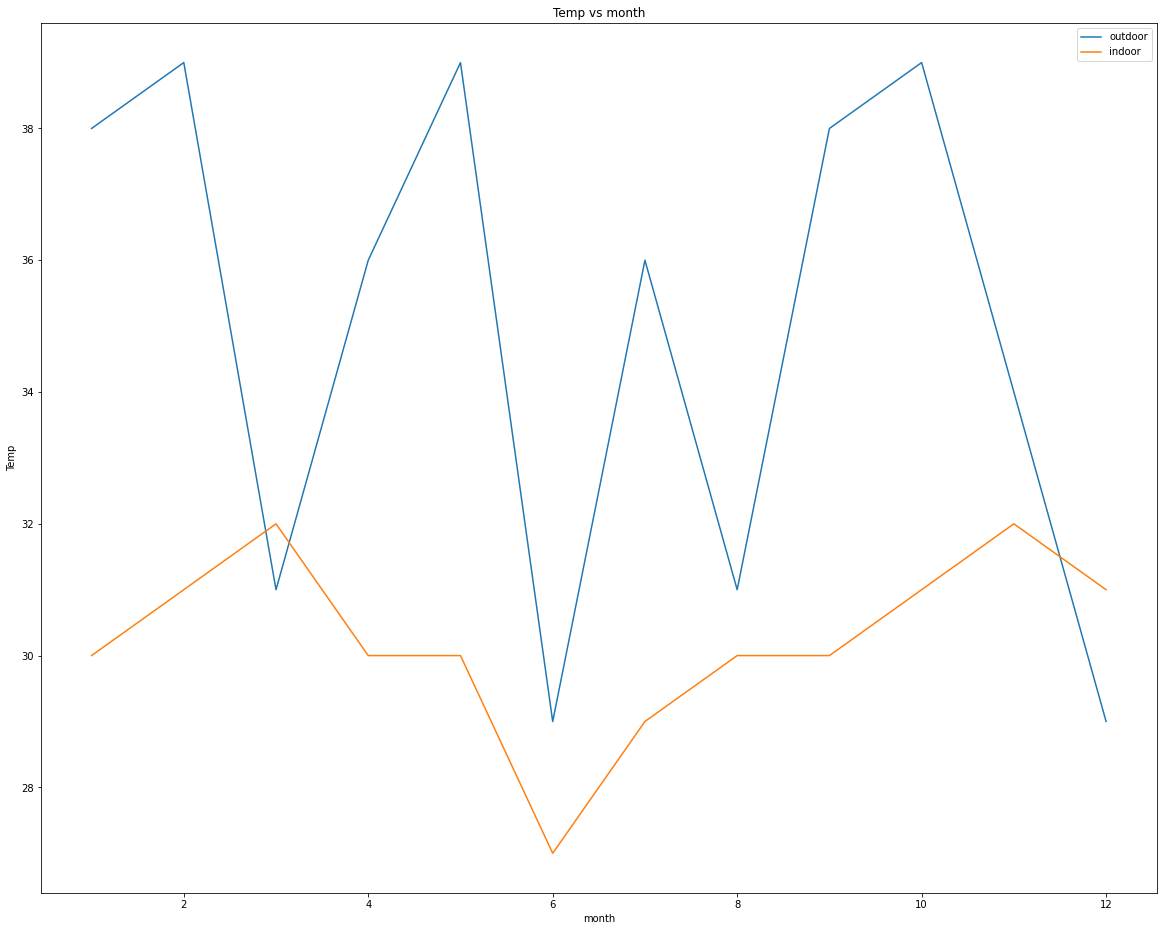

In [ ]:
# Compare the monthly median indoor and outdoor temperatures.
plt.figure(figsize=(20, 16))
plt.plot(np.arange(1, 13), outdoor_median_temp, label='outdoor')
plt.plot(np.arange(1, 13), indoor_median_temp, label='indoor')
plt.legend()
plt.title('Temp vs month')
plt.xlabel('month')
plt.ylabel('Temp')
plt.show()

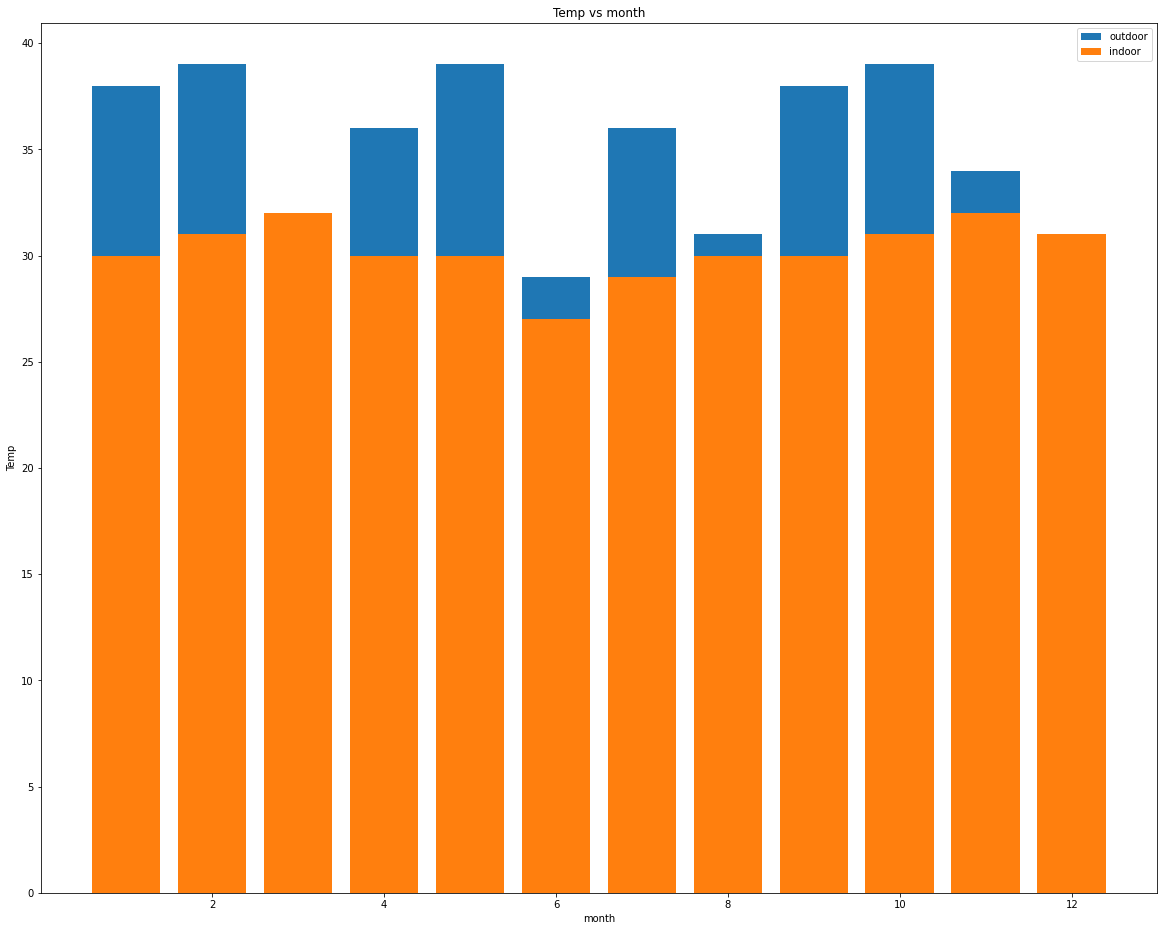

In [ ]:
# Create a bar plot for the monthly median indoor & outdoor temperatures in a single bar chart.
plt.figure(figsize=(20, 16))
plt.bar(np.arange(1, 13), outdoor_median_temp, label='outdoor')
plt.bar(np.arange(1, 13), indoor_median_temp, label='indoor')
plt.legend()
plt.title('Temp vs month')
plt.xlabel('month')
plt.ylabel('Temp')
plt.show()

The hottest months are: February, May, Outober. The coldest month is June.

In [ ]:
indoor_max.loc[:, ['noted_date', 'temp']]

,noted_date,temp
0,2018-01-11 23:33:00,32
1,2018-02-11 22:10:00,32
2,2018-03-12 23:40:00,33
3,2018-04-12 22:05:00,33
4,2018-05-12 21:33:00,32
5,2018-06-12 23:24:00,31
6,2018-07-31 16:28:00,33
7,2018-08-30 14:03:00,33
8,2018-09-30 05:58:00,41
9,2018-10-31 23:54:00,36


In [ ]:
a = df[df['month'] == 7].loc[df['day'] == 30, :]['temp'].max()
#if type(a) == float:
#print('hi')
print(type(a))

<class 'float'>


In [ ]:
# Get the maximum and minimum temperatures for each day in each month.
mo = df['month'].unique()
da = df['day'].unique()

for i in mo:
  for b in da:
    a = df[df['month'] == i].loc[df['day'] == b, :]['temp'].max()
    if type(a) != float:
      print('The highest temperature in the month', i, 'and day', b, 'is', a)
    
    d = df[df['month'] == i].loc[df['day'] == b, :]['temp'].min()
    if type(d) != float:
      print('The lowest temperature in the month', i, 'and day', b, 'is', d)


The highest temperature in the month 8 and day 12 is 42
The lowest temperature in the month 8 and day 12 is 29
The highest temperature in the month 8 and day 30 is 32
The lowest temperature in the month 8 and day 30 is 29
The highest temperature in the month 8 and day 26 is 32
The lowest temperature in the month 8 and day 26 is 30
The highest temperature in the month 8 and day 25 is 32
The lowest temperature in the month 8 and day 25 is 29
The highest temperature in the month 8 and day 19 is 33
The lowest temperature in the month 8 and day 19 is 29
The highest temperature in the month 8 and day 18 is 33
The lowest temperature in the month 8 and day 18 is 29
The highest temperature in the month 8 and day 16 is 34
The lowest temperature in the month 8 and day 16 is 30
The highest temperature in the month 7 and day 12 is 41
The lowest temperature in the month 7 and day 12 is 25
The highest temperature in the month 7 and day 29 is 33
The lowest temperature in the month 7 and day 29 is 30
T

In [ ]:
# Get the hottest day for each month along with the temperature.
outdoor_max.loc[:, ['noted_date', 'temp']]

,noted_date,temp
0,2018-01-12 23:54:00,48
1,2018-02-12 23:58:00,48
2,2018-03-12 23:59:00,49
3,2018-04-12 23:59:00,49
4,2018-05-12 23:57:00,48
5,2018-06-12 23:59:00,42
6,2018-07-31 16:28:00,41
7,2018-08-30 14:01:00,42
8,2018-09-30 22:59:00,51
9,2018-10-31 23:57:00,50


---

#### 9. Heat Index

In [ ]:
# Get the coldest day for each month along with the temperature.
indoor_min.loc[:, ['noted_date', 'temp']]

,noted_date,temp
0,2018-01-11 00:06:00,29
1,2018-02-11 01:31:00,30
2,2018-03-09 09:20:00,21
3,2018-04-09 01:40:00,23
4,2018-05-09 07:19:00,24
5,2018-06-09 07:45:00,24
6,2018-07-09 14:16:00,25
7,2018-08-12 00:03:00,29
8,2018-09-09 10:19:00,24
9,2018-10-08 08:01:00,22


In [ ]:
# Create a function to label the each temperature value on a given day and time with the heat indices as advised in the data-description.
def heat_indices(date):
  wanted_temp = df.loc[df['noted_date'] == date]['temp'].max()
  if wanted_temp <= 32:
    return 'Green'
  if wanted_temp >=33 and wanted_temp<=41:
    return 'Yellow'
  if wanted_temp >=42 and wanted_temp<=53:
    return 'Orange'
  if wanted_temp >=54:
    return 'Red'

heat_indices('2018-07-28 07:06:00')

'Green'

In [ ]:
# Create a function to label the each temperature value on a given day and time with the heat indices as advised in the data-description.
def heat_indices_sec():
  a = []
  for wanted_temp in df['temp']:
    if wanted_temp <= 32:
      a.append('Green')
    if wanted_temp >=33 and wanted_temp<=41:
      a.append('Yellow')
    if wanted_temp >=42 and wanted_temp<=53:
      a.append('Orange')
    if wanted_temp >=54:
      a.append('Red')
  a = pd.Series(a)
  return a 
heat_indices_sec()

0         Green
1         Green
2        Yellow
3        Yellow
4         Green
          ...  
97601     Green
97602     Green
97603     Green
97604     Green
97605     Green
Length: 97606, dtype: object

In [ ]:
# Add the 'heat_index' column in the DataFrame containing the heat indices corresponding to the temperature values on a given day and time.
df['heat_index'] = heat_indices_sec()

In [ ]:
# Get the counts of the heat zones.
group_heat_index = df.groupby(by=['heat_index', 'out/in'])
heat_index_agg = group_heat_index.agg(func={'temp' : ['max', 'count']})
heat_index_agg

temp       
                   max  count
heat_index out/in            
Green      In       32  16812
           Out      32  24845
Orange     Out      51  12407
Yellow     In       41   3533
           Out      41  40009

In [ ]:
# Get the percentage distribution of the heat zones.
heat_index_agg[('temp', 'percent')] = heat_index_agg[('temp', 'count')] * 100 / df.shape[0]
heat_index_agg

temp                  
                   max  count    percent
heat_index out/in                       
Green      In       32  16812  17.224351
           Out      32  24845  25.454378
Orange     Out      51  12407  12.711309
Yellow     In       41   3533   3.619655
           Out      41  40009  40.990308

The heat zone yellow has the most number of recordings and is 40.99%.

---